<p></p>

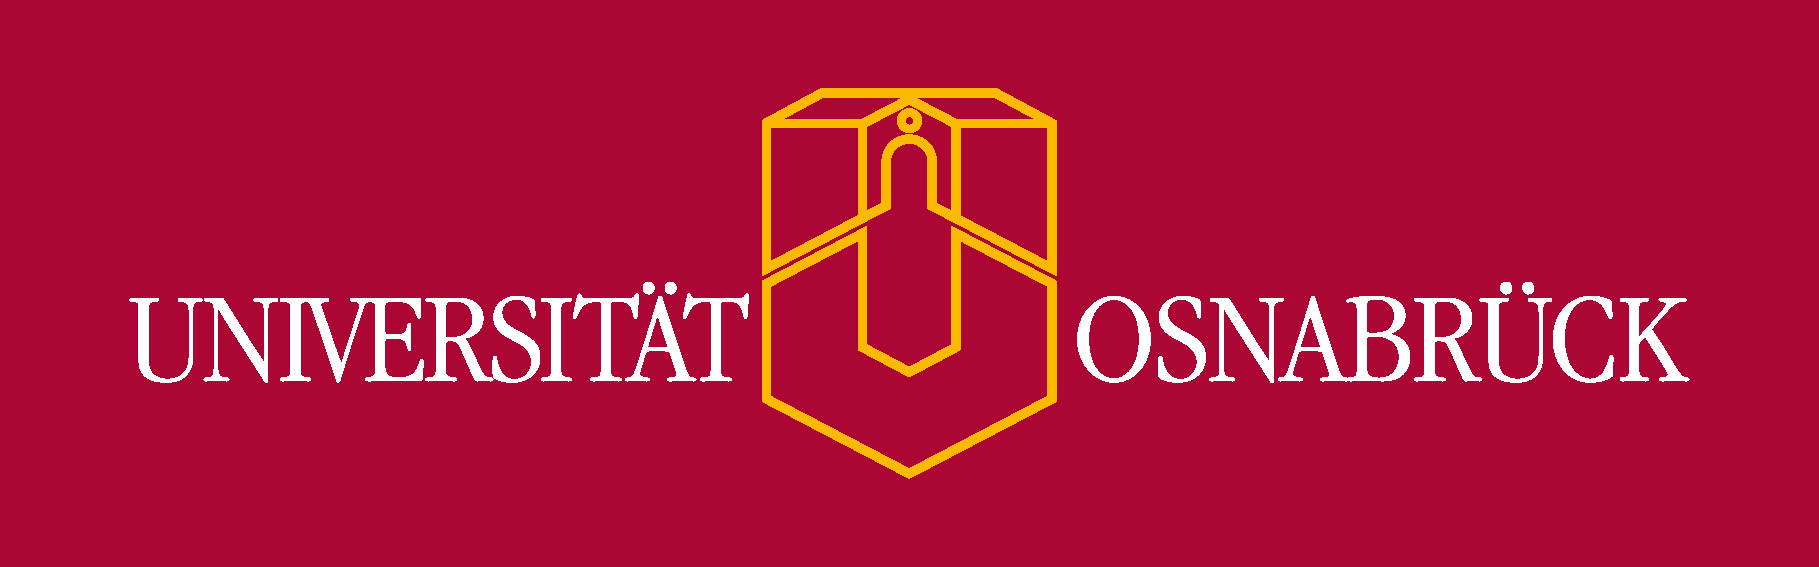


<h1><center>Künstliche Intelligenz</center> <a class="tocSkip"></a></h1>
<h3><center>Wintersemester 2023/24</center> <a class="tocSkip"></a></h3>
<center>Prof. Dr. Joachim Hertzberg, Alexander Mock, Marcel Dokters, Paul Kaiser</center>

# Übungsblatt 1: Suchverfahren

## Aufgabe: Suchverfahren
### Teilaufgaben


1. Benennen und erläutern Sie die vier Bewertungskriterien für Suchverfahren aus der Vorlesung.

Optimalität, Zeitbedarf, Speicherbedarf, Vollständigkeit


2. Geben Sie Zeit- und Speicherkomplexität der iterativen Tiefensuche an.

Speicher: O (bd) 
Zeit: O (b^d)

3. Bei der bidirektionalen Breitensuche wird ein zusätzlicher Suchbaum, ausgehend vom Zielzustand,
durchsucht, bis sich beide Suchbäume treffen. Erläutern Sie die dafür notwendigen Voraussetzungen
und geben Sie Zeit- und Speicherkomplexität an. Ist ein solcher Ansatz generell sinnvoll?

Dafür ist es nötig, dass man theoretisch vom Ziel aus den KOMPLETTEN Weg zum Start konstruieren könnte. Ist dies nicht gegeben macht dies keinen Sinn / ist unmöglich.
Es ist teilweise umständlich, um es sich vor die Augen zu führen, jedoch gibt es Situationen, in denen es Sinn macht dieses Verfahren zum Zweck der Speicherplatzminimierung zu nutzen.

4. Warum ist eine bidirektionale Tiefensuche allgemein keine gute Idee?

Weil es umständlich und unnötig ist.

## Aufgabe: Flussüberquerung

Ein Bauer kommt mit Ziege, Wolf und Kohl zu einem Fluss, den
er überqueren möchte. Die beiden Ufer des Flusses seien mit
Ost und West bezeichnet. Der Bauer befindet sich mit Ziege,
Wolf und Kohl am Ostufer des Flusses. Es gibt ein Boot, aber es
hat nur Platz für zwei, und der Bauer ist der Einzige, der rudern
kann. Wenn die Ziege und der Kohl unbeaufsichtigt zusammen
sind, dann frisst die Ziege den Kohl. Wenn Wolf und Ziege ohne
den Bauer zusammen sind, wird die Ziege gefressen.
Wie kann der Bauer durch mehrfaches Überqueren des Flusses
mit Wolf, Ziege und Kohl über den Fluss, also ans Westufer,
kommen?

![Problem](https://imgs.xkcd.com/comics/logic_boat.png)
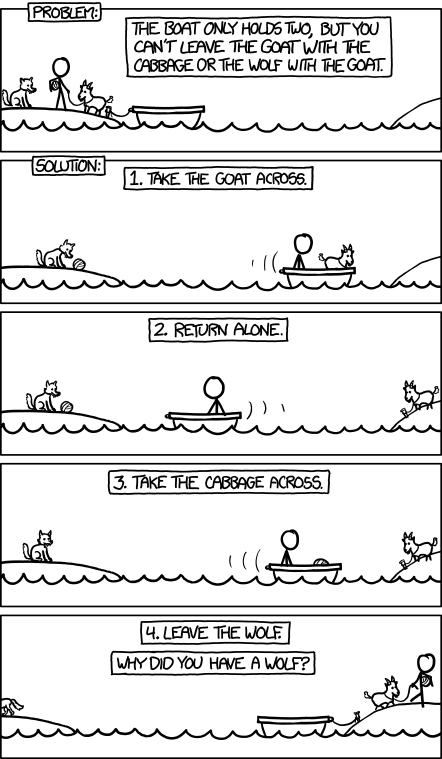

### Teilaufgaben
1. Formulieren Sie dieses Rätsel als Suchproblem, d.h., geben Sie eine Repräsentation aller Zustände an. Was sind der Startzustand, der Endzustand und die Operatoren?



YOUR ANSWER HERE

2. Lösen Sie das Suchproblem mit einer Methode Ihrer Wahl. Zeichnen Sie den Suchbaum und beschreiben Sie die Lösung.



Schaf rüber, 
Bauer zurück, 
Kohl rüber, 
Schaf und Bauer zurück, 
Wolf rüber, 
Bauer zurück, 
Schaf und Bauer rüber.

## Aufgabe: Uninformierte Suche im Labyrinth

In dieser Aufgabe werden Sie die in der Vorlesung behandelten uninformierten Suchverfahren zur Lösung
von Labyrinthen einsetzen. Zur Generierung und Repräsentation eines Labyrinthes steht Ihnen in der Datei `maze.py` die Klasse ```Maze```zur Verfügung. Diese erzeugt ein Labyrinth beliebiger Größe und bietet die Basisfunktionalität zum Aufbau des Suchbaumes. Zusätzlich sind einige Beispiele gegeben. Die entsprechenden Dateien können Sie mit der Funktion ```load_from_file``` in der ```Maze```-Klasse
laden.

Zur Ausführung benötigen Sie die zusätzlichen Pakete `matplotlib` und `numba` (optional), welche Sie mit
```bash
    conda install matplotlib numba
```
installieren können.


### Programmiervorlage

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# import the maze class
from maze import Maze

#### Laden gespeicherter Labyrinthe

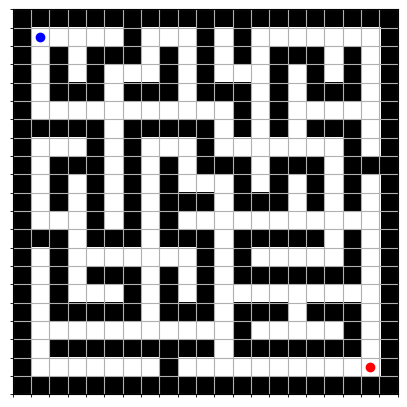

In [2]:
examples = ["examples/labyrinth_20x20.maze", 
            "examples/labyrinth_50x50.maze", 
            "examples/labyrinth_100x100.maze", 
            "examples/labyrinth_200x200.maze"]
m = Maze.load_from_file(examples[0])
fig = m.plot()
plt.show()

#### Generierung neue Labyrinthe

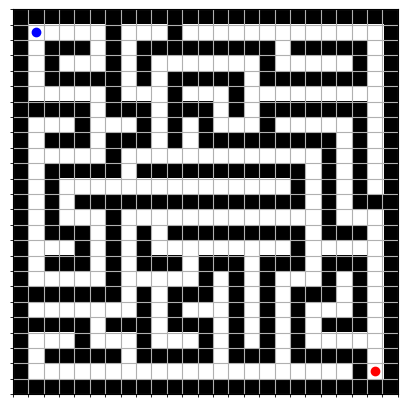

In [3]:
m = Maze((25,25))
fig = m.plot()
plt.show()

#### Naive "Suche"

[[ 1  1  1 ... 19 19 19]
 [ 1  2  1 ... 17 18 19]] ()
naive search length 981


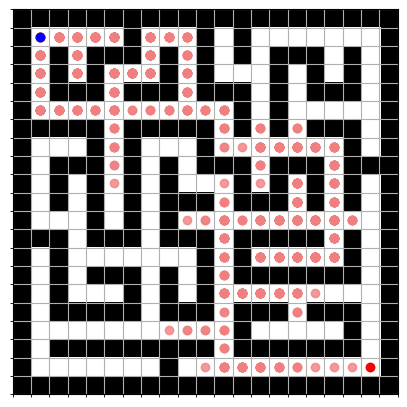

In [4]:
from __future__ import annotations
import numpy as np
from typing import Tuple
import numpy.typing as npt

def naive_search(maze: Maze, 
                 start: Tuple[int, int], 
                 goal: Tuple[int, int]) -> Tuple[npt.NDArray, Tuple]:
    from random import choice
    pos = start
    path = [pos]
    while pos != goal:
        # always take a random action
        neighbors = maze.get_neighbors(pos)
        pos = choice(neighbors)
        path.append(pos)
    path = np.array(path).T
    return path, ()

m = Maze.load_from_file("examples/labyrinth_20x20.maze")
path, stats = naive_search(m, m.start, m.end)
print(path, stats)
print("naive search length", len(path[0]))
fig = m.plot()
fig.gca().scatter(path[1], path[0], c='lightcoral', zorder=2, alpha=0.8)
plt.show()

### Teilaufgaben
1. Implementieren einen Algorithmus zur Suche eines Pfades vom Start- zum Zielpunkt mittels Breitensuche wie in der Vorlesung dargestellt. Ermitteln Sie für die gegebenen Beispiele:
    - Laufzeit
    - Anzahl der expandierten Knoten
    - Maximale Tiefe des Suchbaumes
    - Maximale Größe der Suchfront
    - Länge der gefundenen Lösung

 Stellen Sie den ermittelten Pfad sowie alle vom Algorithmus besuchten Felder des Labyrinths grafisch
dar.

[[  1   1   1 ... 197 198 199]
 [  1   2   3 ... 199 199 199]] ()
breadth first search length 553


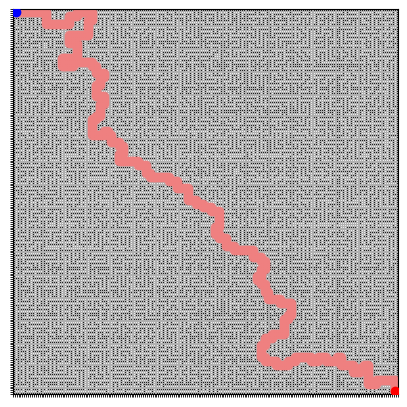

In [40]:
# implement search function here
from __future__ import annotations
import numpy as np
from typing import Tuple
import numpy.typing as npt

def find_path_bfs(maze: Maze, 
                 start: Tuple[int, int], 
                 goal: Tuple[int, int]) -> Tuple[npt.NDArray, Tuple]:
    """
    Breadth First Search implementation for the Maze class.
    
    :param maze: Maze object containing the elements used for the specific search.
    :param start: Starting coordinates of the maze.
    :param goal: Goal coordinates of the maze.
    :return: An array of coordinates representing the solution path.
    """
    visited: set = set()
    
    # Wir erstellen eine Startlösung mit einem Wert.
    queue: list[tuple[int, list]] = [(start, [start])]
    
    # Während noch Elemente in der Queue sind. 
    while queue:
        # FIFO Prinzip
        (current_node, path_to) = queue.pop(0)
        
        # Sind wir am Ziel?
        if current_node == goal:
            return np.array(path_to).T, ()
        
        # Füge den Knoten zur Visited-Liste hinzu.
        visited.add(current_node)

        # Überprüfe alle noch nicht besuchten Nachbarn.
        for neighbor in maze.get_neighbors(coord=current_node, visited=visited):
            
            # Path zwischenspeichern und in ein neues Objekt zur Queue hinzufügen.
            # Typecast darf NICHT entfernt werden, macht die Lösung kaputt. Nein, ich habe keine Ahnung warum.
            new_path = list(path_to)
            new_path.append(neighbor)
            queue.append((neighbor, new_path))

    raise Exception("Es konnte kein Weg zum Ziel gefunden werden.")

m = Maze.load_from_file("examples/labyrinth_200x200.maze")
path, stats = find_path_bfs(m, m.start, m.end)
print(path, stats)
print("breadth first search length", len(path[0]))
fig = m.plot()
fig.gca().scatter(path[1], path[0], c='lightcoral', zorder=2, alpha=0.8)
plt.show()

2. Implementieren Sie analog den Algorithmus der Tiefensuche. Ermitteln Sie auch hier die Werte aus dem vorherigen Teil und vergleichen Sie die Ergebnisse mit denen der Breitensuche. Was fällt Ihnen auf?

[[  1   1   1 ... 197 198 199]
 [  1   2   3 ... 199 199 199]] ()
depth first search length 1493


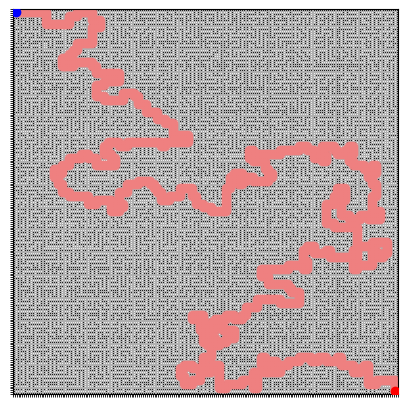

In [41]:
# implement search function here
from __future__ import annotations
import numpy as np
from typing import Tuple
import numpy.typing as npt

def find_path_dfs(maze: Maze, 
                 start: Tuple[int, int], 
                 goal: Tuple[int, int]) -> Tuple[npt.NDArray, Tuple]:
    """
    Depth First Search implementation for the Maze class.
    
    :param maze: Maze object containing the elements used for the specific search.
    :param start: Starting coordinates of the maze.
    :param goal: Goal coordinates of the maze.
    :return: An array of coordinates representing the solution path.
    """
    visited: set = set()
    
    # Wir erstellen eine Startlösung mit einem Wert.
    stack: list[tuple[int, list]] = [(start, [start])]
    
    # Während noch Elemente in der Queue sind. 
    while stack:
        # LIFO Prinzip
        (current_node, path_to) = stack.pop()
        
        # Sind wir am Ziel?
        if current_node == goal:
            return np.array(path_to).T, ()
        
        # Füge den Knoten zur Visited-Liste hinzu.
        visited.add(current_node)

        # Überprüfe alle noch nicht besuchten Nachbarn.
        for neighbor in maze.get_neighbors(coord=current_node, visited=visited):
            
            # Path zwischenspeichern und in ein neues Objekt zur Queue hinzufügen.
            # Typecast darf NICHT entfernt werden, macht die Lösung kaputt. Nein, ich habe keine Ahnung warum.
            new_path = list(path_to)
            new_path.append(neighbor)
            stack.append((neighbor, new_path))

    raise Exception("Es konnte kein Weg zum Ziel gefunden werden.")

m = Maze.load_from_file("examples/labyrinth_200x200.maze")
path, stats = find_path_dfs(m, m.start, m.end)
print(path, stats)
print("depth first search length", len(path[0]))
fig = m.plot()
fig.gca().scatter(path[1], path[0], c='lightcoral', zorder=2, alpha=0.8)
plt.show()

2. Erweitern Sie die Tiefensuche zu einer iterativ beschränkten Tiefensuche. Vergleichen Sie erneut die
ermittelten Werte.

In [ ]:
# implement search function here
from __future__ import annotations
import numpy as np
from typing import Tuple
import numpy.typing as npt

def find_path_bfs(maze, start, goal) -> list[tuple] | None:
    visited: set = set()
    
    # Wir erstellen eine Startlösung mit einem Wert.
    queue: list[tuple[int, list]] = [(start, [start])]
    optimal: list | None = None
    it: int = 0
    max_it: int = 1000
    
    while queue and it < max_it:
        it += 1
        (current, path) = queue.pop(0)
        
        # Sind wir am Ziel?
        if current == goal:
            if not optimal or len(path) < len(optimal):
                optimal = path

        # Wurde der Knoten schon besucht, dann gehen wir zur nächsten Iteration.
        if current in visited:
            continue
        
        # Füge den Knoten zur Visited-Liste hinzu.
        visited.add(current)
        
        # Überprüfe alle Nachbarn auf mögliche Wege.
        for neighbor in maze.get_neighbors(current):
            # Ist der Nachbar noch nicht besucht, dann kann er vielleicht zum Ziel führen.
            if neighbor not in visited:
                # Path zwischenspeichern und in ein neues Objekt zur Queue hinzufügen.
                new_path = list(path)
                new_path.append(neighbor)
                queue.append((neighbor, new_path))

    return optimal

m = Maze.load_from_file("examples/labyrinth_200x200.maze")
path = find_path_bfs(m, m.start, m.end)

convert_path = [[],[]]

for coord in path:
    convert_path[0].append(coord[0])
    convert_path[1].append(coord[1])

fig = m.plot()
fig.gca().scatter(convert_path[1], convert_path[0], c='lightcoral', zorder=2, alpha=0.8)
plt.show()


In [ ]:
# call your search functions here
# print results, plots, etc.       
# implement search function here
from __future__ import annotations
import numpy as np

def find_path_dfs(maze, start, goal) -> list[tuple] | None:
    visited: set = set()
    
    # Wir erstellen eine Startlösung mit einem Wert.
    stack: list[tuple[int, list]] = [(start, [start])]
    
    optimal: list | None = None
    
    it: int = 0
    max_it: int = 1000
    
    while stack and it < max_it:
        it += 1
        (current, path) = stack.pop()
        
        # Sind wir am Ziel?
        if current == goal:
            if not optimal or len(path) < len(optimal):
                optimal = path

        # Wurde der Knoten schon besucht, dann gehen wir zur nächsten Iteration.
        if current in visited:
            continue
        
        # Füge den Knoten zur Visited-Liste hinzu.
        visited.add(current)
        
        # Überprüfe alle Nachbarn auf mögliche Wege.
        for neighbor in maze.get_neighbors(current):
            # Ist der Nachbar noch nicht besucht, dann kann er vielleicht zum Ziel führen.
            if neighbor not in visited:
                # Path zwischenspeichern und in ein neues Objekt zur Queue hinzufügen.
                new_path = list(path)
                new_path.append(neighbor)
                stack.append((neighbor, new_path))

    return optimal

m = Maze.load_from_file("examples/labyrinth_20x20.maze")
path = find_path_dfs(m, m.start, m.end)

convert_path = [[],[]]
for coord in path:
    convert_path[0].append(coord[0])
    convert_path[1].append(coord[1])

fig = m.plot()
fig.gca().scatter(convert_path[1], convert_path[0], c='lightcoral', zorder=2, alpha=0.8)
plt.show()

